# Services

A service is a deterministic finite automaton.
Follow some examples on how to build services
using the library APIs.

We took the examples from:

De Giacomo, G., Mecella, M., & Patrizi, F. (2014).
  Automated service composition based on behaviors: The roman model.
  In Web services foundations (pp. 189-214). Springer, New York, NY.

## Examples

In [10]:
from docs.notebooks.utils import render_service
from stochastic_service_composition.services import Service, build_deterministic_service_from_transitions, build_system_service


def bathroom_heating_device() -> Service:
    """Build the bathroom heating device."""
    transitions = {
        "air_cold": {
            "cold_air_on": "air_cold",
            "air_off": "air_off",
        },
        "air_off": {
            "cold_air_on": "air_cold",
            "hot_air_on": "air_hot",
        },
        "air_hot": {"hot_air_on": "air_hot", "air_off": "air_off"},
    }
    final_states = {"air_off"}
    initial_state = "air_off"
    return build_deterministic_service_from_transitions(transitions, initial_state, final_states)  # type: ignore

def bathtub_device() -> Service:
    """Build the bathtub device."""
    transitions = {
        "empty": {
            "fill_up_buthub": "filled",
        },
        "filled": {"empty_buthub": "empty"},
    }
    final_states = {"empty"}
    initial_state = "empty"
    return build_deterministic_service_from_transitions(transitions, initial_state, final_states)  # type: ignore

def door_device() -> Service:
    """Build the door device."""
    transitions = {
        "unique": {
            "open": "unique",
            "close": "unique",
        },
    }
    final_states = {"unique"}
    initial_state = "unique"
    return build_deterministic_service_from_transitions(transitions, initial_state, final_states)  # type: ignore

def kitchen_exhaust_fan_device() -> Service:
    """Build the kitchen exhaust fan device."""
    transitions = {
        "unique": {
            "vent_kitchen": "unique",
        },
    }
    final_states = {"unique"}
    initial_state = "unique"
    return build_deterministic_service_from_transitions(transitions, initial_state, final_states)  # type: ignore

def user_behaviour() -> Service:
    """Build the user behaviour."""
    transitions = {
        "s0": {
            "move_to_bedroom": "s0",
            "move_to_bathroom": "s1",
            "move_to_kitchen": "s3",
        },
       "s1": {
            "move_to_bathroom": "s1",
            "wash": "s2",
        },
       "s2": {
            "move_to_bedroom": "s0",
        },
       "s3": {
            "move_to_kitchen": "s3",
            "cook_eggs": "s0",
            "prepare_tea": "s0",
        },
    }
    final_states = {"s0"}
    initial_state = "s0"
    return build_deterministic_service_from_transitions(transitions, initial_state, final_states)  # type: ignore


bathroom_heating_service = bathroom_heating_device()
bathtub_service = bathtub_device()
door_service = door_device()
kitchen_exhaust_fan_service = kitchen_exhaust_fan_device()
user_behaviour = user_behaviour()


- The bathroom heating device:

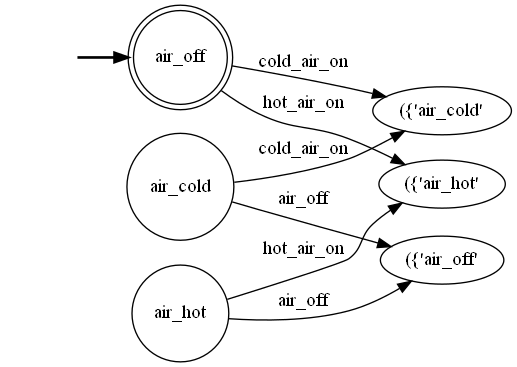

In [11]:
render_service(bathroom_heating_service)

- The bathtub device:

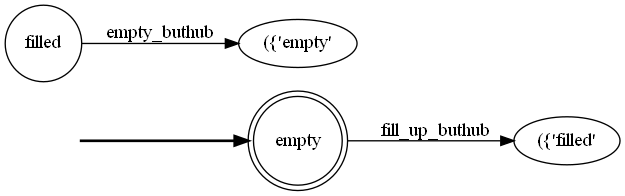

In [3]:
render_service(bathtub_service)


- The door device:

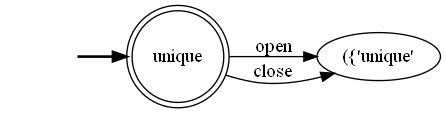

In [4]:
render_service(door_service)


- The Kitchen exhaust fan device:

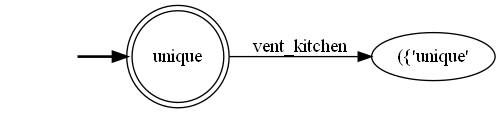

In [5]:
render_service(kitchen_exhaust_fan_service)

- The user behaviour:

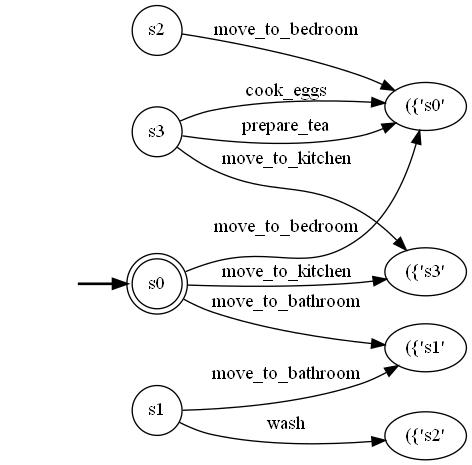

In [6]:
render_service(user_behaviour)



## System service

In this section, we show the computation of the *system service*,
i.e. the build_system_service between the services.

### Product between bathroom heating and door devices

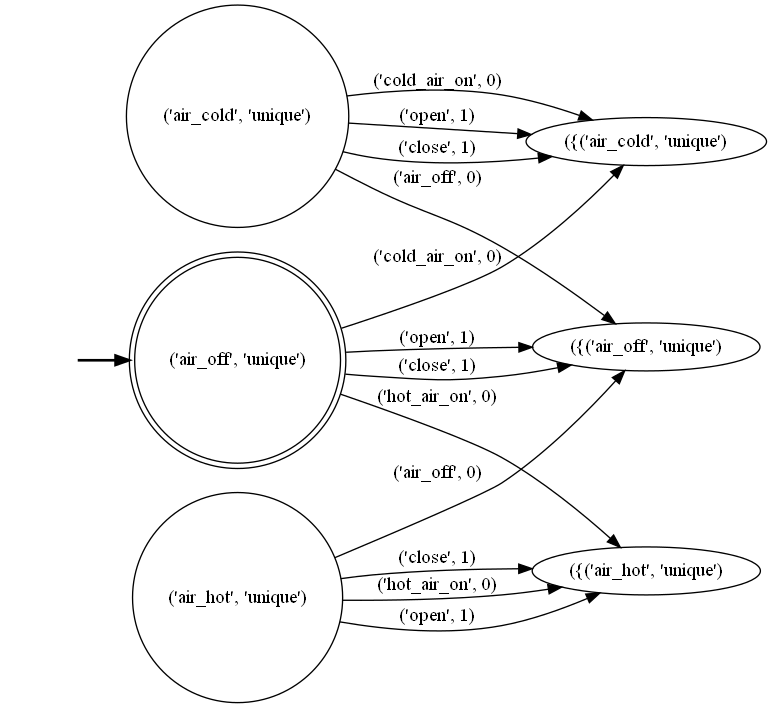

In [7]:
system_service = build_system_service(bathroom_heating_service, door_service)
render_service(system_service)

### Product between bathroom heating and bathtub devices

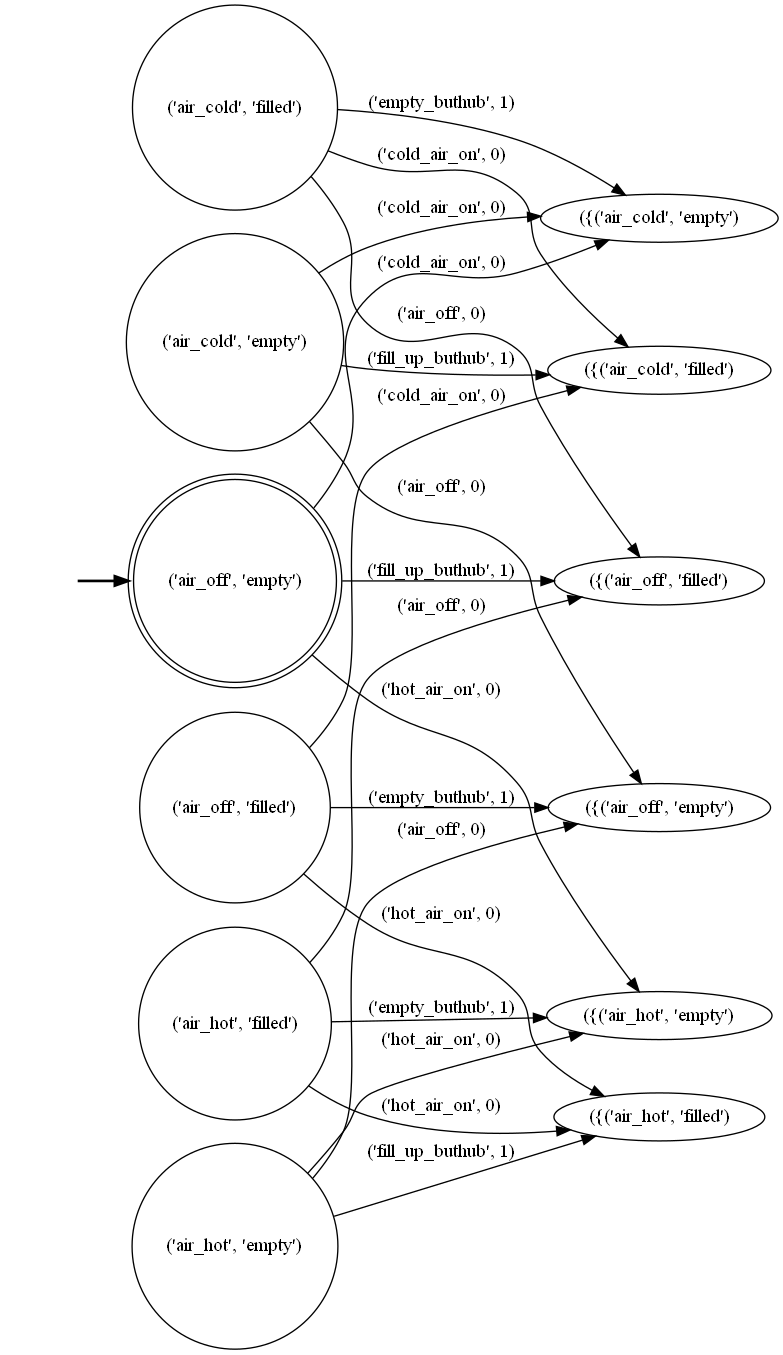

In [8]:
system_service = build_system_service(bathroom_heating_service, bathtub_service)
render_service(system_service)

### Product between all the services

Number of states: 6
Number of actions: 8
Number of final states: 1


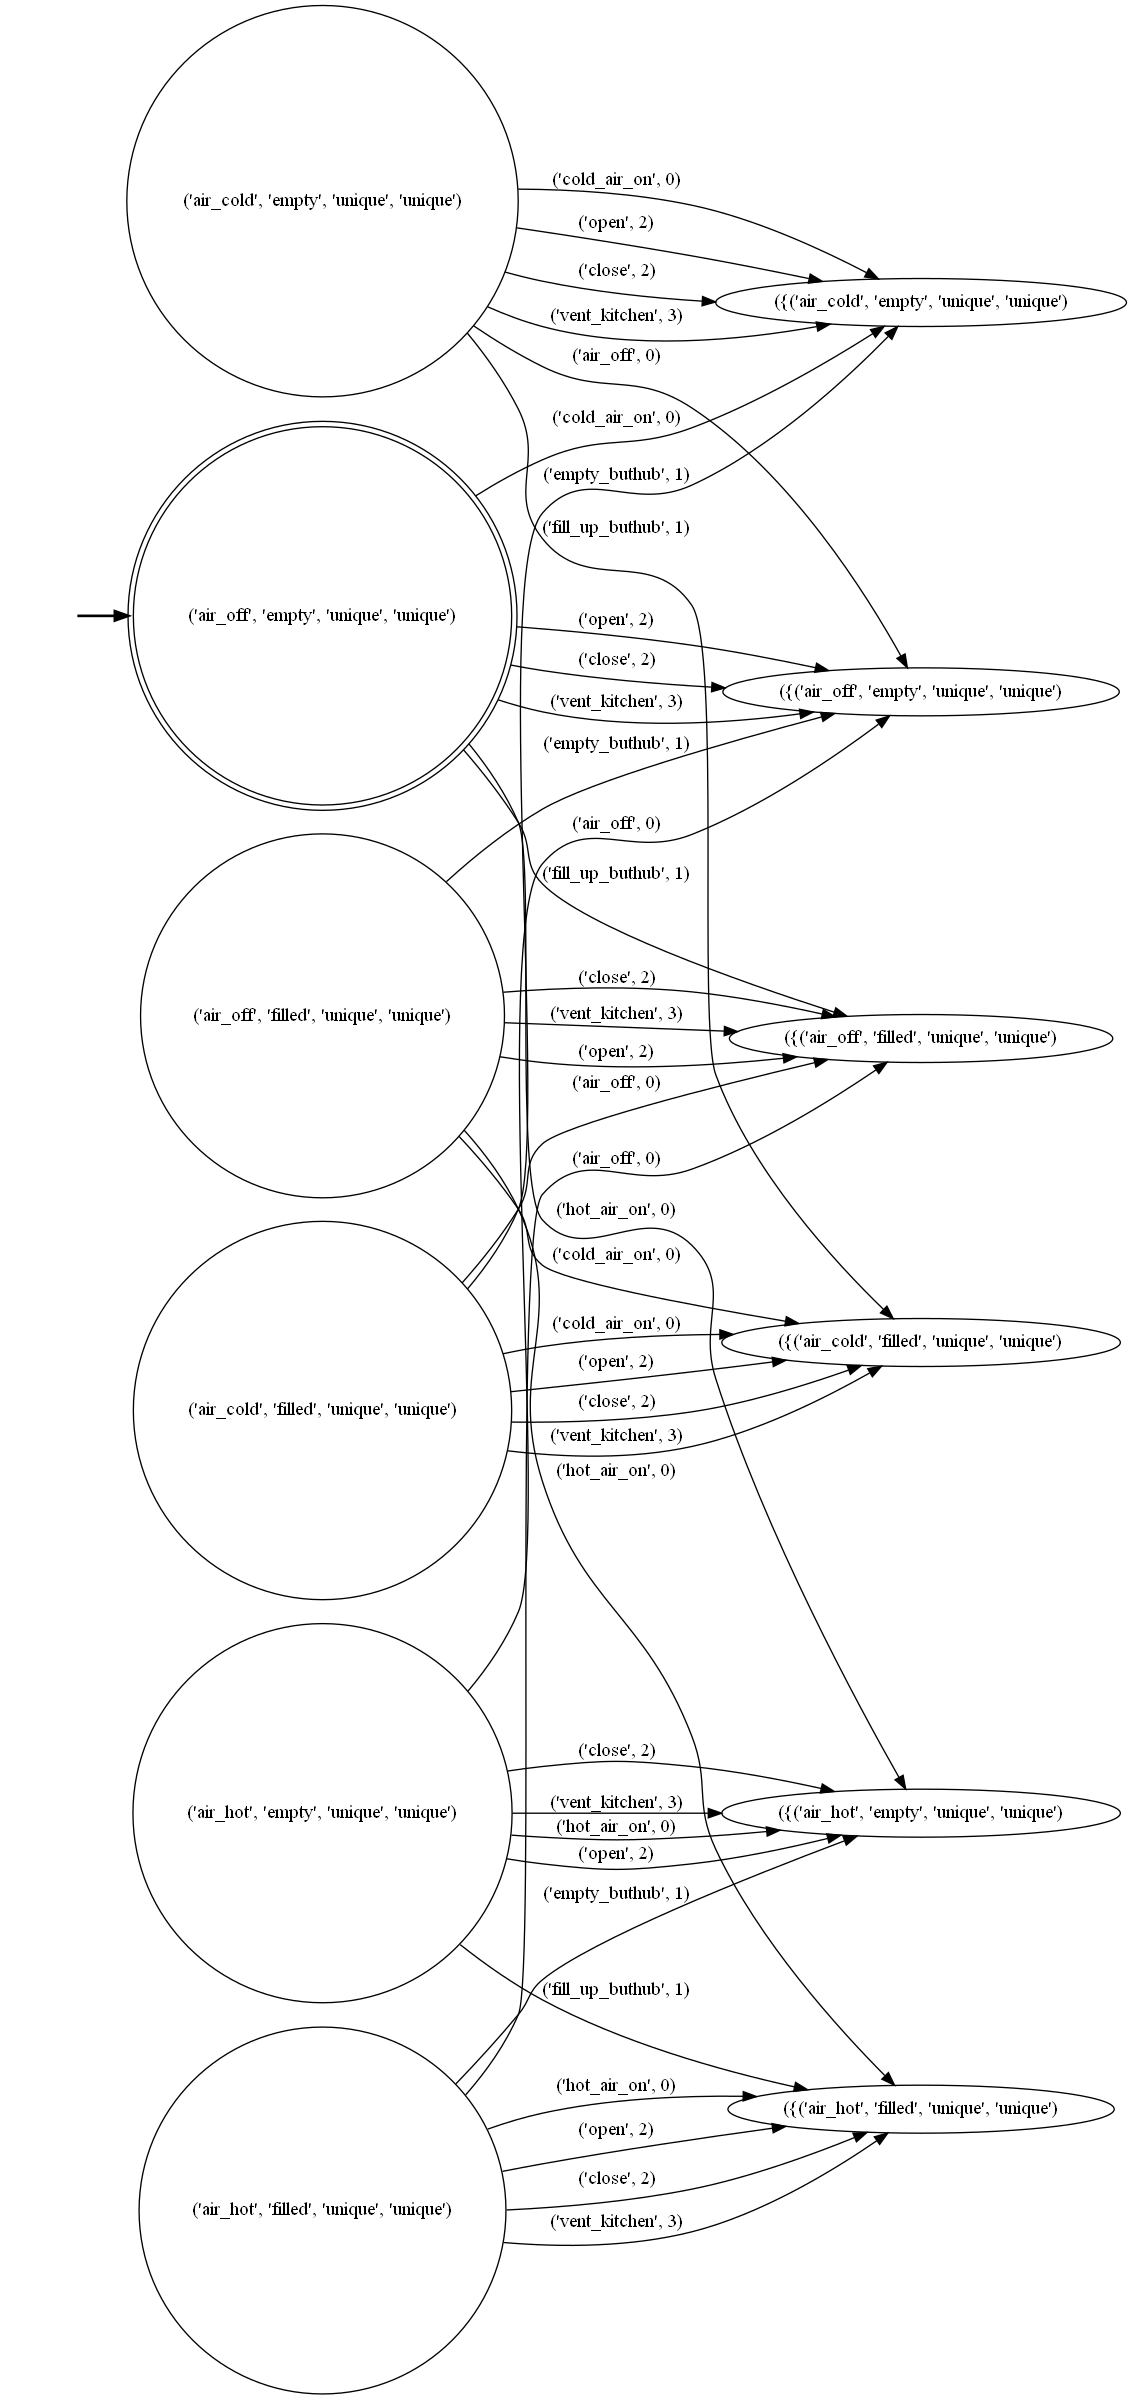

In [9]:
system_service = build_system_service(bathroom_heating_service, bathtub_service, door_service, kitchen_exhaust_fan_service)

print(f"Number of states: {len(system_service.states)}")
print(f"Number of actions: {len(system_service.actions)}")
print(f"Number of final states: {len(system_service.final_states)}")
render_service(system_service)